In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'T:\\DCProjects\\GitHub\\BikeCounting\\BikeMap')
import ReviewData as RD

In [2]:
bikeFacilities = RD.readBikeFacility(add=False)

In [3]:
import geopandas as gpd

In [4]:
bph = gpd.read_file("T:/DCProjects/StoryMap/BikeCounting/BikeCounts/Output/BPH.shp")

In [5]:
bph = bph.to_crs(epsg=3857)

In [6]:
gpd.options.use_pygeos = True

In [7]:
import pygeos

In [8]:
spatial_join = gpd.sjoin_nearest(bph, bikeFacilities, distance_col="distances")

In [9]:
spatial_join.head()

,Locatin,Year,BPH,Latitud,Longitd,Site_Nm,DblCntL,IsOnewy,OnwyDrc,IsSdwlk,geometry,index_right,name,type,source,distances
0,S32ndAccessPath,2016,0.098214,44.037466,-122.980292,Access Path between S 32nd Pl & S 32nd St,0,0,<Null>,0,POINT (-13690103.483 5471241.965),147,None,Bike Lane,LCOG,50.944522
1,S32ndAccessPath,2019,0.109972,44.037466,-122.980292,Access Path between S 32nd Pl & S 32nd St,0,0,<Null>,0,POINT (-13690103.483 5471241.965),147,None,Bike Lane,LCOG,50.944522
2,YolandaEast23rd,2019,0.169972,44.072392,-122.990277,Yolanda Ave East of 23rd St,0,0,<Null>,0,POINT (-13691215.008 5476651.855),740,None,Bike Lane,LCOG,0.175681
3,WillametteSouth24thWestSidewalk,2017,0.225464,44.032808,-123.090711,Willamette St West Sidewalk South of 24th Pl,0,0,<Null>,1,POINT (-13702395.270 5470520.701),2793,None,Bike Lane,EUG,6.627695
63,WillametteSouth24thWestSidewalk,2016,1.031447,44.032808,-123.090711,Willamette St West Sidewalk South of 24th Pl,0,0,<Null>,1,POINT (-13702395.270 5470520.701),2793,None,Bike Lane,EUG,6.627695


In [35]:
spatial_join.Year.min()

2012

In [36]:
spatial_join.Year.max()

2020

In [10]:
type(spatial_join)

geopandas.geodataframe.GeoDataFrame

In [18]:
print(spatial_join.crs)

epsg:3857


In [19]:
spatial_join.distances.describe()

count     667.000000
mean       89.337060
std       486.062045
min         0.075835
25%         0.907384
50%         1.660238
75%         6.322402
max      3899.685572
Name: distances, dtype: float64

<AxesSubplot:>

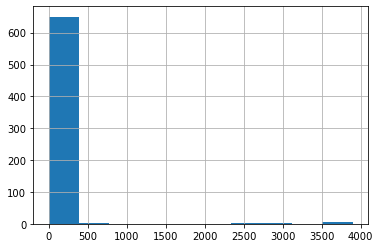

In [20]:
spatial_join.distances.hist()

In [29]:
spatial_join[spatial_join.distances <= 10][['BPH', 'type']].groupby('type').agg('mean')

,BPH
type,
Bike Lane,6.383479
Bike Route,6.705824
Neighborhood Greenway,8.139473
Pedestrian and Bicycle Access Way,7.225904
Shared Use Path,9.384510


In [30]:
spatial_join[spatial_join.distances > 10][['BPH', 'type']].groupby('type').agg('mean')

,BPH
type,
Bike Lane,2.265129
Bike Route,2.129945
Connectivity for Routing,0.745850
Neighborhood Greenway,4.197231
Paved Shoulder,1.559042
Pedestrian and Bicycle Access Way,2.267299
Shared Use Path,2.578143
